In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
user = pd.read_csv('user.csv', dtype = {'User_id': str})
campaign = pd.read_csv('campaign.csv', dtype = {'Campaign_id': str})
purchase = pd.read_csv('purchase.csv', dtype = {'User_id': str})
interact = pd.read_csv('interact.csv', dtype = {'User_id': str, 'Campaign_id': str})
product = pd.read_csv('product.csv')

In [3]:
purchase['Model'] = purchase['Model'].fillna('Other') #Clean data: fill missing values

In [4]:
purchase['Purchase_day'] = purchase['Purchase_day'].replace(to_replace={0:30})
purchase['Purchase_day'] = np.where((purchase['Purchase_month']==2)&(purchase['Purchase_day']>28), [28] * purchase.shape[0], purchase['Purchase_day'])
#Clean data: correct date time

In [5]:
user['tmp'] = 0
campaign['tmp'] = 0
df = pd.merge(user, campaign, on='tmp', how='outer')
user.shape, campaign.shape, df.shape
#Cross join 2 dataframes 

((20000, 4), (40, 7), (800000, 10))

In [6]:
df = df.drop('tmp', axis=1)

In [7]:
df

,User_id,Year_of_birth,Gender,Start_date,End_date,Campaign_type,Model,Series,Campaign_id
0,3713087409444908179,1982,1.0,2011-08-01,2011-09-30,pre,1,A,3713087409
1,3713087409444908179,1982,1.0,2012-07-02,2012-08-31,pre,2,A,7554402398
2,3713087409444908179,1982,1.0,2013-07-02,2013-08-31,pre,3,A,1687604933
3,3713087409444908179,1982,1.0,2014-08-01,2014-09-30,pre,4,A,7587835399
4,3713087409444908179,1982,1.0,2015-06-01,2015-07-31,pre,5,A,6799016569
...,...,...,...,...,...,...,...,...,...
799995,16593507087486383889,1987,1.0,2016-03-01,2016-03-31,post,6,B,14795309059
799996,16593507087486383889,1987,1.0,2017-04-01,2017-05-01,post,7,B,16264149150
799997,16593507087486383889,1987,1.0,2018-03-01,2018-03-31,post,8,B,11483833140
799998,16593507087486383889,1987,1.0,2019-02-01,2019-03-03,post,9,B,10530765771


In [8]:
df = df[df['Campaign_type']=='post']
df = df.rename(columns={'Start_date':'base_date'})
df = df.drop('End_date', axis=1)
# Filter post launching campaign, rename column title

In [9]:
df = df.rename(columns={'Model':'Campaign_model','Series':'Campaign_series'}) #rename column title, to differentiate with model & series in purchase history

In [10]:
df

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id
10,3713087409444908179,1982,1.0,2011-10-01,post,1,A,4615867097
11,3713087409444908179,1982,1.0,2012-09-01,post,2,A,10677889990
12,3713087409444908179,1982,1.0,2013-09-01,post,3,A,16570399437
13,3713087409444908179,1982,1.0,2014-10-01,post,4,A,13984037253
14,3713087409444908179,1982,1.0,2015-08-01,post,5,A,2721833483
...,...,...,...,...,...,...,...,...
799995,16593507087486383889,1987,1.0,2016-03-01,post,6,B,14795309059
799996,16593507087486383889,1987,1.0,2017-04-01,post,7,B,16264149150
799997,16593507087486383889,1987,1.0,2018-03-01,post,8,B,11483833140
799998,16593507087486383889,1987,1.0,2019-02-01,post,9,B,10530765771


In [11]:
purchase = purchase[~pd.isna(purchase['Purchase_year'])]
purchase['Purchase_year'] = [('%04d' % x) for x in purchase['Purchase_year'].astype(int).values]
purchase['Purchase_month'] = [('%02d' % x) for x in purchase['Purchase_month'].astype(int).values]
purchase['Purchase_day'] = [('%02d' % x) for x in purchase['Purchase_day'].astype(int).values]
purchase['base_date'] = purchase['Purchase_year'] + '-' + purchase['Purchase_month'] + '-' + purchase['Purchase_day']
purchase = purchase.drop(['Purchase_year','Purchase_month','Purchase_day'], axis=1)
purchase = purchase.rename(columns={'Series':'Product_series','Model':'Product_model'})
purchase
#Cleaning: formulate base_date column from separate year, month, day columns

,User_id,Product_series,Product_model,base_date
0,3713087409444908179,Other,Other,2006-10-06
1,3713087409444908179,Other,Other,2007-10-11
2,3713087409444908179,Other,Other,2012-04-08
3,3713087409444908179,Other,Other,2014-04-04
4,3713087409444908179,Other,Other,2016-11-07
...,...,...,...,...
158967,16593507087486383889,B,2,2012-05-03
158968,16593507087486383889,Other,Other,2013-08-11
158969,16593507087486383889,Other,Other,2015-06-03
158970,16593507087486383889,Other,Other,2018-10-17


In [12]:
purchase = pd.merge(purchase, user, on='User_id', how='left')
for col in ['Campaign_type','Campaign_model','Campaign_series','Campaign_id']:
  purchase[col] = np.nan


In [13]:
for col in ['Product_series','Product_model']:
  df[col] = np.nan

In [14]:
purchase = purchase[df.columns]

In [15]:
df


,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model
10,3713087409444908179,1982,1.0,2011-10-01,post,1,A,4615867097,NaN,NaN
11,3713087409444908179,1982,1.0,2012-09-01,post,2,A,10677889990,NaN,NaN
12,3713087409444908179,1982,1.0,2013-09-01,post,3,A,16570399437,NaN,NaN
13,3713087409444908179,1982,1.0,2014-10-01,post,4,A,13984037253,NaN,NaN
14,3713087409444908179,1982,1.0,2015-08-01,post,5,A,2721833483,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
799995,16593507087486383889,1987,1.0,2016-03-01,post,6,B,14795309059,NaN,NaN
799996,16593507087486383889,1987,1.0,2017-04-01,post,7,B,16264149150,NaN,NaN
799997,16593507087486383889,1987,1.0,2018-03-01,post,8,B,11483833140,NaN,NaN
799998,16593507087486383889,1987,1.0,2019-02-01,post,9,B,10530765771,NaN,NaN


In [16]:
purchase.head()

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model
0,3713087409444908179,1982,1.0,2006-10-06,NaN,NaN,NaN,NaN,Other,Other
1,3713087409444908179,1982,1.0,2007-10-11,NaN,NaN,NaN,NaN,Other,Other
2,3713087409444908179,1982,1.0,2012-04-08,NaN,NaN,NaN,NaN,Other,Other
3,3713087409444908179,1982,1.0,2014-04-04,NaN,NaN,NaN,NaN,Other,Other
4,3713087409444908179,1982,1.0,2016-11-07,NaN,NaN,NaN,NaN,Other,Other


In [17]:
df = pd.concat([df, purchase]).sort_values(['User_id','base_date'])
# from [14] to [19] merge purchase & campaign in order to calculate purchase history at base date of marketing campaign

In [18]:
df

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model
99820,10000099596358040339,1995,0.0,2001-05-22,NaN,NaN,NaN,NaN,Other,Other
99821,10000099596358040339,1995,0.0,2006-01-18,NaN,NaN,NaN,NaN,Other,Other
99822,10000099596358040339,1995,0.0,2009-01-08,NaN,NaN,NaN,NaN,Other,Other
500910,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN
500890,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
37737,9999892773214337297,1992,0.0,2018-08-01,post,8.0,A,3291887422,NaN,NaN
37758,9999892773214337297,1992,0.0,2019-02-01,post,9.0,B,10530765771,NaN,NaN
37738,9999892773214337297,1992,0.0,2019-08-01,post,9.0,A,7037657696,NaN,NaN
37759,9999892773214337297,1992,0.0,2020-02-01,post,10.0,B,2056813848,NaN,NaN


In [19]:
first_purchase = df[pd.notna(df['Product_model'])].groupby('User_id')['base_date'].first().reset_index(name='First_purchase')
first_purchase.head()
# find out first purchase of each user

,User_id,First_purchase
0,10000099596358040339,2001-05-22
1,10002134195333118155,2001-01-05
2,10002461955448154319,2001-03-14
3,10005203855513699745,2004-06-30
4,10005348599546239145,2002-02-11


In [20]:
df = pd.merge(df, first_purchase, on='User_id', how='left')
df.head()
# add first purchase column into original user table

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model,First_purchase
0,10000099596358040339,1995,0.0,2001-05-22,NaN,NaN,NaN,NaN,Other,Other,2001-05-22
1,10000099596358040339,1995,0.0,2006-01-18,NaN,NaN,NaN,NaN,Other,Other,2001-05-22
2,10000099596358040339,1995,0.0,2009-01-08,NaN,NaN,NaN,NaN,Other,Other,2001-05-22
3,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN,2001-05-22
4,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN,2001-05-22


In [21]:
df['Last_purchase'] = np.where(pd.notna(df['Product_series']), df['base_date'], [np.nan] * df.shape[0])
df.head()

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model,First_purchase,Last_purchase
0,10000099596358040339,1995,0.0,2001-05-22,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2001-05-22
1,10000099596358040339,1995,0.0,2006-01-18,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2006-01-18
2,10000099596358040339,1995,0.0,2009-01-08,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2009-01-08
3,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN,2001-05-22,NaN
4,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN,2001-05-22,NaN


In [22]:
for i in range(50):
  df['tmp'] = df.groupby('User_id')['Last_purchase'].shift(1)
  df['Last_purchase'] = np.where(pd.isna(df['Last_purchase']), df['tmp'], df['Last_purchase'])
df = df.drop('tmp', axis=1)
df.head()

#Create last purchase column by base_date:IF record is equivalent to purchase action, last_purchase = base_date, ELSE last_purchase=most recent purchase_date

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model,First_purchase,Last_purchase
0,10000099596358040339,1995,0.0,2001-05-22,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2001-05-22
1,10000099596358040339,1995,0.0,2006-01-18,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2006-01-18
2,10000099596358040339,1995,0.0,2009-01-08,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2009-01-08
3,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN,2001-05-22,2009-01-08
4,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN,2001-05-22,2009-01-08


In [23]:
df['base_date'] = pd.to_datetime(df['base_date'])
df['First_purchase'] = pd.to_datetime(df['First_purchase'])
df['Last_purchase'] = pd.to_datetime(df['Last_purchase']) # convert string to date time

In [24]:
df['Purchase_count'] = np.where(pd.notna(df['Product_series']), 1, 0)
df['Purchase_count'] = df.groupby('User_id')['Purchase_count'].cumsum().values
df.head() #calculate total purchase number up until base_date

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model,First_purchase,Last_purchase,Purchase_count
0,10000099596358040339,1995,0.0,2001-05-22,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2001-05-22,1
1,10000099596358040339,1995,0.0,2006-01-18,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2006-01-18,2
2,10000099596358040339,1995,0.0,2009-01-08,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2009-01-08,3
3,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN,2001-05-22,2009-01-08,3
4,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN,2001-05-22,2009-01-08,3


In [25]:
df['Frequency'] = np.where(df['Purchase_count']==1, [np.nan] * df.shape[0], (df['Last_purchase'] - df['First_purchase']).dt.days / (df['Purchase_count'] - 1))
#calculate frequency, IF purchase_count=1, set nan, ELSE calculate interval

In [26]:
df['Recency'] = (df['base_date'] - df['Last_purchase']).dt.days
#how long is from last_purchase to base_date

In [27]:
df.head()

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model,First_purchase,Last_purchase,Purchase_count,Frequency,Recency
0,10000099596358040339,1995,0.0,2001-05-22,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2001-05-22,1,NaN,0.0
1,10000099596358040339,1995,0.0,2006-01-18,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2006-01-18,2,1702.0,0.0
2,10000099596358040339,1995,0.0,2009-01-08,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2009-01-08,3,1394.0,0.0
3,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN,2001-05-22,2009-01-08,3,1394.0,813.0
4,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN,2001-05-22,2009-01-08,3,1394.0,996.0


In [28]:
df['Last_product_model'] = df['Product_model']
df['Last_product_series'] = df['Product_series']
for i in range(50):
  df['tmp1'] = df.groupby('User_id')['Last_product_model'].shift(1)
  df['Last_product_model'] = np.where(pd.isna(df['Last_product_model']), df['tmp1'], df['Last_product_model'])
  df['tmp2'] = df.groupby('User_id')['Last_product_series'].shift(1)
  df['Last_product_series'] = np.where(pd.isna(df['Last_product_series']), df['tmp2'], df['Last_product_series'])
df = df.drop(['tmp1','tmp2'], axis=1)
# find out the most recent product belong to which series

In [29]:
df

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model,First_purchase,Last_purchase,Purchase_count,Frequency,Recency,Last_product_model,Last_product_series
0,10000099596358040339,1995,0.0,2001-05-22,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2001-05-22,1,NaN,0.0,Other,Other
1,10000099596358040339,1995,0.0,2006-01-18,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2006-01-18,2,1702.000000,0.0,Other,Other
2,10000099596358040339,1995,0.0,2009-01-08,NaN,NaN,NaN,NaN,Other,Other,2001-05-22,2009-01-08,3,1394.000000,0.0,Other,Other
3,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN,2001-05-22,2009-01-08,3,1394.000000,813.0,Other,Other
4,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN,2001-05-22,2009-01-08,3,1394.000000,996.0,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558967,9999892773214337297,1992,0.0,2018-08-01,post,8.0,A,3291887422,NaN,NaN,2004-06-04,2017-06-07,7,791.833333,420.0,Other,Other
558968,9999892773214337297,1992,0.0,2019-02-01,post,9.0,B,10530765771,NaN,NaN,2004-06-04,2017-06-07,7,791.833333,604.0,Other,Other
558969,9999892773214337297,1992,0.0,2019-08-01,post,9.0,A,7037657696,NaN,NaN,2004-06-04,2017-06-07,7,791.833333,785.0,Other,Other
558970,9999892773214337297,1992,0.0,2020-02-01,post,10.0,B,2056813848,NaN,NaN,2004-06-04,2017-06-07,7,791.833333,969.0,Other,Other


In [30]:
interact = pd.merge(interact, campaign, on='Campaign_id', how='left')
#merge interact vs campaign table

In [31]:
interact_sum = interact.groupby(['User_id','Campaign_id','Start_date','End_date','Campaign_type','Model','Series'])['Interact_cnt'].sum().reset_index()
# sum user for each campaign

In [32]:
interact_sum.head()

,User_id,Campaign_id,Start_date,End_date,Campaign_type,Model,Series,Interact_cnt
0,10000099596358040339,10069732865,2016-09-01,2016-10-01,post,6,A,8
1,10000099596358040339,10109409942,2015-01-30,2015-03-31,pre,5,B,14
2,10000099596358040339,10530765771,2019-02-01,2019-03-03,post,9,B,10
3,10000099596358040339,10677889990,2012-09-01,2012-10-01,post,2,A,11
4,10000099596358040339,11247919067,2012-03-01,2012-04-30,pre,2,B,22


In [33]:
interact_sum = interact_sum[interact_sum['Campaign_type']=='pre'][['User_id','Model','Series','Interact_cnt']]
interact_sum = pd.merge(interact_sum, campaign[campaign['Campaign_type']=='post'][['Start_date','Model','Series']], on=['Model','Series'], how='left')
interact_sum.head()
# filter 

,User_id,Model,Series,Interact_cnt,Start_date
0,10000099596358040339,5,B,14,2015-04-01
1,10000099596358040339,2,B,22,2012-05-01
2,10000099596358040339,7,B,24,2017-04-01
3,10000099596358040339,10,A,18,2020-08-01
4,10000099596358040339,8,A,18,2018-08-01


In [34]:
interact_sum['tmp'] = [1] * interact_sum.shape[0]
interact_sum['Interact_sum'] = interact_sum.groupby(['User_id','Series'])['Interact_cnt'].cumsum()
interact_sum['tmp_sum'] = interact_sum.groupby(['User_id','Series'])['tmp'].cumsum()
interact_sum['Interact_avg'] = interact_sum['Interact_sum'] / interact_sum['tmp_sum']
interact_sum.head()

,User_id,Model,Series,Interact_cnt,Start_date,tmp,Interact_sum,tmp_sum,Interact_avg
0,10000099596358040339,5,B,14,2015-04-01,1,14,1,14.0
1,10000099596358040339,2,B,22,2012-05-01,1,36,2,18.0
2,10000099596358040339,7,B,24,2017-04-01,1,60,3,20.0
3,10000099596358040339,10,A,18,2020-08-01,1,18,1,18.0
4,10000099596358040339,8,A,18,2018-08-01,1,36,2,18.0


In [35]:
interact_sum = interact_sum.sort_values(['User_id','Series','Start_date'])
interact_sum.head()

,User_id,Model,Series,Interact_cnt,Start_date,tmp,Interact_sum,tmp_sum,Interact_avg
11,10000099596358040339,1,A,12,2011-10-01,1,104,6,17.333333
17,10000099596358040339,2,A,18,2012-09-01,1,146,9,16.222222
8,10000099596358040339,3,A,14,2013-09-01,1,92,5,18.400000
18,10000099596358040339,4,A,22,2014-10-01,1,168,10,16.800000
16,10000099596358040339,5,A,12,2015-08-01,1,128,8,16.000000


In [36]:
interact_sum['Interact_avg_last3'] = interact_sum.groupby(['User_id','Series'])['Interact_cnt'].rolling(3).mean().values
interact_sum.head()
# count the last 3 interacts

,User_id,Model,Series,Interact_cnt,Start_date,tmp,Interact_sum,tmp_sum,Interact_avg,Interact_avg_last3
11,10000099596358040339,1,A,12,2011-10-01,1,104,6,17.333333,NaN
17,10000099596358040339,2,A,18,2012-09-01,1,146,9,16.222222,NaN
8,10000099596358040339,3,A,14,2013-09-01,1,92,5,18.400000,14.666667
18,10000099596358040339,4,A,22,2014-10-01,1,168,10,16.800000,18.000000
16,10000099596358040339,5,A,12,2015-08-01,1,128,8,16.000000,16.000000


In [37]:
interact_sum = interact_sum.rename(columns={'Start_date':'base_date','Model':'Campaign_model','Series':'Campaign_series'})
interact_sum = interact_sum.drop(['tmp','tmp_sum'], axis=1)
interact_sum.head()
# rename columns

,User_id,Campaign_model,Campaign_series,Interact_cnt,base_date,Interact_sum,Interact_avg,Interact_avg_last3
11,10000099596358040339,1,A,12,2011-10-01,104,17.333333,NaN
17,10000099596358040339,2,A,18,2012-09-01,146,16.222222,NaN
8,10000099596358040339,3,A,14,2013-09-01,92,18.400000,14.666667
18,10000099596358040339,4,A,22,2014-10-01,168,16.800000,18.000000
16,10000099596358040339,5,A,12,2015-08-01,128,16.000000,16.000000


In [38]:
interact_sum['base_date'] = pd.to_datetime(interact_sum['base_date'])
interact_sum = interact_sum.drop(['Interact_sum'], axis=1)
interact_sum.head()
#convert string to date time

,User_id,Campaign_model,Campaign_series,Interact_cnt,base_date,Interact_avg,Interact_avg_last3
11,10000099596358040339,1,A,12,2011-10-01,17.333333,NaN
17,10000099596358040339,2,A,18,2012-09-01,16.222222,NaN
8,10000099596358040339,3,A,14,2013-09-01,18.400000,14.666667
18,10000099596358040339,4,A,22,2014-10-01,16.800000,18.000000
16,10000099596358040339,5,A,12,2015-08-01,16.000000,16.000000


In [39]:
df = pd.merge(df[pd.notna(df['Campaign_model'])], interact_sum, on=['User_id','Campaign_model','Campaign_series','base_date'])
df.head()
#merge RFM vs interact parts

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,Product_series,Product_model,First_purchase,Last_purchase,Purchase_count,Frequency,Recency,Last_product_model,Last_product_series,Interact_cnt,Interact_avg,Interact_avg_last3
0,10000099596358040339,1995,0.0,2011-04-01,post,1.0,B,17928414209,NaN,NaN,2001-05-22,2009-01-08,3,1394.0,813.0,Other,Other,22,20.500000,NaN
1,10000099596358040339,1995,0.0,2011-10-01,post,1.0,A,4615867097,NaN,NaN,2001-05-22,2009-01-08,3,1394.0,996.0,Other,Other,12,17.333333,NaN
2,10000099596358040339,1995,0.0,2012-05-01,post,2.0,B,12746050356,NaN,NaN,2001-05-22,2009-01-08,3,1394.0,1209.0,Other,Other,22,18.000000,NaN
3,10000099596358040339,1995,0.0,2012-09-01,post,2.0,A,10677889990,NaN,NaN,2001-05-22,2009-01-08,3,1394.0,1332.0,Other,Other,18,16.222222,NaN
4,10000099596358040339,1995,0.0,2013-04-01,post,3.0,B,13144273147,NaN,NaN,2001-05-22,2009-01-08,3,1394.0,1544.0,Other,Other,22,22.000000,22.0


In [40]:
df = df.drop(['Product_series','Product_model'], axis=1)

In [41]:
tmp_df = purchase[['User_id','base_date','Product_series','Product_model']].rename(columns={'base_date':'Purchase_date','Product_series':'Campaign_series','Product_model':'Campaign_model'})
tmp_df.head()

,User_id,Purchase_date,Campaign_series,Campaign_model
0,3713087409444908179,2006-10-06,Other,Other
1,3713087409444908179,2007-10-11,Other,Other
2,3713087409444908179,2012-04-08,Other,Other
3,3713087409444908179,2014-04-04,Other,Other
4,3713087409444908179,2016-11-07,Other,Other


In [42]:
tmp_df['Purchase_date'] = pd.to_datetime(tmp_df['Purchase_date'])
df['Campaign_model'] = df['Campaign_model'].astype(int).astype(str)
tmp_df['Campaign_model'] = tmp_df['Campaign_model'].astype(str)
df = pd.merge(df, tmp_df, on=['User_id','Campaign_series','Campaign_model'], how='left')
#label extraction

In [43]:
df.head()

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,First_purchase,Last_purchase,Purchase_count,Frequency,Recency,Last_product_model,Last_product_series,Interact_cnt,Interact_avg,Interact_avg_last3,Purchase_date
0,10000099596358040339,1995,0.0,2011-04-01,post,1,B,17928414209,2001-05-22,2009-01-08,3,1394.0,813.0,Other,Other,22,20.500000,NaN,NaT
1,10000099596358040339,1995,0.0,2011-10-01,post,1,A,4615867097,2001-05-22,2009-01-08,3,1394.0,996.0,Other,Other,12,17.333333,NaN,NaT
2,10000099596358040339,1995,0.0,2012-05-01,post,2,B,12746050356,2001-05-22,2009-01-08,3,1394.0,1209.0,Other,Other,22,18.000000,NaN,NaT
3,10000099596358040339,1995,0.0,2012-09-01,post,2,A,10677889990,2001-05-22,2009-01-08,3,1394.0,1332.0,Other,Other,18,16.222222,NaN,NaT
4,10000099596358040339,1995,0.0,2013-04-01,post,3,B,13144273147,2001-05-22,2009-01-08,3,1394.0,1544.0,Other,Other,22,22.000000,22.0,NaT


In [44]:
df['Delay_purchase'] = (df['Purchase_date'] - df['base_date']).dt.days
df['Label'] = np.where((df['Delay_purchase']>=90)|(pd.isna(df['Delay_purchase'])), [0] * df.shape[0], [1] * df.shape[0])
#label extration

In [45]:
df['Delay_purchase'] = (df['Purchase_date'] - df['base_date']).dt.days
df['Label'] = np.where((df['Delay_purchase']>=90)|(pd.isna(df['Delay_purchase'])), [0] * df.shape[0], [1] * df.shape[0])

In [46]:
df.head()

,User_id,Year_of_birth,Gender,base_date,Campaign_type,Campaign_model,Campaign_series,Campaign_id,First_purchase,Last_purchase,...,Frequency,Recency,Last_product_model,Last_product_series,Interact_cnt,Interact_avg,Interact_avg_last3,Purchase_date,Delay_purchase,Label
0,10000099596358040339,1995,0.0,2011-04-01,post,1,B,17928414209,2001-05-22,2009-01-08,...,1394.0,813.0,Other,Other,22,20.500000,NaN,NaT,NaN,0
1,10000099596358040339,1995,0.0,2011-10-01,post,1,A,4615867097,2001-05-22,2009-01-08,...,1394.0,996.0,Other,Other,12,17.333333,NaN,NaT,NaN,0
2,10000099596358040339,1995,0.0,2012-05-01,post,2,B,12746050356,2001-05-22,2009-01-08,...,1394.0,1209.0,Other,Other,22,18.000000,NaN,NaT,NaN,0
3,10000099596358040339,1995,0.0,2012-09-01,post,2,A,10677889990,2001-05-22,2009-01-08,...,1394.0,1332.0,Other,Other,18,16.222222,NaN,NaT,NaN,0
4,10000099596358040339,1995,0.0,2013-04-01,post,3,B,13144273147,2001-05-22,2009-01-08,...,1394.0,1544.0,Other,Other,22,22.000000,22.0,NaT,NaN,0


In [47]:
df['Last_is_A'] = np.where(df['Last_product_series']=='A', 1, 0)
df['Last_is_B'] = np.where(df['Last_product_series']=='B', 1, 0)
df['Interact_recent_vs_last3'] = df['Interact_cnt'] / df['Interact_avg_last3']
#one hot encoding

In [48]:
df['Age'] = df['base_date'].dt.year - df['Year_of_birth'] #calculate user age

In [49]:
df.columns

Index(['User_id', 'Year_of_birth', 'Gender', 'base_date', 'Campaign_type',
       'Campaign_model', 'Campaign_series', 'Campaign_id', 'First_purchase',
       'Last_purchase', 'Purchase_count', 'Frequency', 'Recency',
       'Last_product_model', 'Last_product_series', 'Interact_cnt',
       'Interact_avg', 'Interact_avg_last3', 'Purchase_date', 'Delay_purchase',
       'Label', 'Last_is_A', 'Last_is_B', 'Interact_recent_vs_last3', 'Age'],
      dtype='object')

In [50]:
feature_cols = ['Age','Purchase_count','Last_is_A','Last_is_B','Interact_cnt','Interact_avg']
label_col = 'Label'

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 

In [61]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

In [65]:
df_A = df[df['Campaign_series']=='A']
df_B = df[df['Campaign_series']=='B']

In [69]:
df_A.shape, df_B.shape, df.shape

((199999, 25), (199997, 25), (399996, 25))

In [70]:
df_A['base_date'].unique()

array(['2011-10-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [73]:
df_A_train = df_A[df_A['base_date']<'2020-01-01']
df_A_test = df_A[df_A['base_date']>'2020-01-01']
df_B_train = df_B[df_B['base_date']<'2020-01-01']
df_B_test = df_B[df_B['base_date']>'2020-01-01']


In [77]:
df_A_train.shape, df_A_test.shape, df_A.shape

((179999, 25), (20000, 25), (199999, 25))

In [78]:
df_B_train.shape, df_B_test.shape, df_B.shape

((179998, 25), (19999, 25), (199997, 25))

In [79]:
X_A_train = df_A_train[feature_cols]
y_A_train = df_A_train[label_col]
X_B_train = df_B_train[feature_cols]
y_B_train = df_B_train[label_col]
X_A_test = df_A_test[feature_cols]
y_A_test = df_A_test[label_col]
X_B_test = df_B_test[feature_cols]
y_B_test = df_B_test[label_col]

In [83]:
A_normalizer = MinMaxScaler().fit(X=X_A_train)
B_normalizer = MinMaxScaler().fit(X=X_B_train)

In [84]:
X_A_train_norm = A_normalizer.transform(X_A_train)
X_A_test_norm = A_normalizer.transform(X_A_test)
X_B_train_norm = B_normalizer.transform(X_B_train)
X_B_test_norm = B_normalizer.transform(X_B_test)

In [86]:
logreg_A = LogisticRegression().fit(X_A_train_norm, y_A_train)
logreg_B = LogisticRegression().fit(X_B_train_norm, y_B_train) 

In [89]:
X_A_test_prediction = logreg_A.predict(X_A_test_norm)
X_A_test_prediction_proba = logreg_A.predict_proba(X_A_test_norm)[:,1]
X_B_test_prediction = logreg_B.predict(X_B_test_norm)
X_B_test_prediction_proba = logreg_B.predict_proba(X_B_test_norm)[:,1]

In [90]:
roc_auc_score(y_A_test, X_A_test_prediction_proba), roc_auc_score(y_B_test, X_B_test_prediction_proba)

(0.8570155560938364, 0.8439835513011886)

In [91]:
from sklearn.metrics import plot_roc_curve

C:\Users\huyenctt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


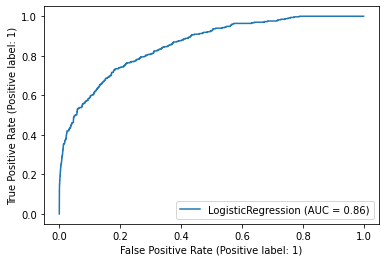

In [92]:
plot_roc_curve(logreg_A, X_A_test_norm, y_A_test)

C:\Users\huyenctt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


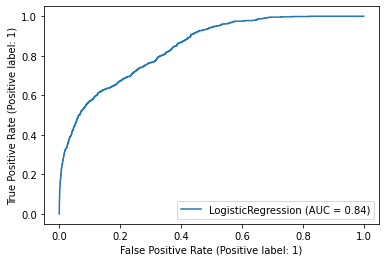

In [93]:
plot_roc_curve(logreg_B, X_B_test_norm, y_B_test)

In [98]:
A_res = pd.DataFrame({'actual': y_A_test, 'prediction': X_A_test_prediction_proba})
A_pop = []
A_tp = []
A_tn = []
A_fp = []
A_fn = []
for i in range(1, 100):
    threshold = np.quantile(X_A_test_prediction_proba, i / 100)
    A_pop.append(A_res[A_res['prediction'] >= threshold].shape[0])
    A_tp.append(A_res[(A_res['prediction'] >= threshold) & (A_res['actual'] == 1)].shape[0])
    A_tn.append(A_res[(A_res['prediction'] < threshold) & (A_res['actual'] == 0)].shape[0])
    A_fp.append(A_res[(A_res['prediction'] >= threshold) & (A_res['actual'] == 0)].shape[0])
    A_fn.append(A_res[(A_res['prediction'] < threshold) & (A_res['actual'] == 1)].shape[0])

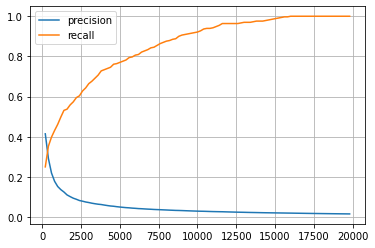

In [102]:
plt.plot(np.array(A_pop), np.array(A_tp) / (np.array(A_tp) + np.array(A_fp)), label='precision')
plt.plot(np.array(A_pop), np.array(A_tp) / (np.array(A_tp) + np.array(A_fn)), label='recall')
plt.grid()
plt.legend()
plt.show()

In [103]:
B_res = pd.DataFrame({'actual': y_B_test, 'prediction': X_B_test_prediction_proba})
B_pop = []
B_tp = []
B_tn = []
B_fp = []
B_fn = []
for i in range(1, 100):
    threshold = np.quantile(X_B_test_prediction_proba, i / 100)
    B_pop.append(B_res[B_res['prediction'] >= threshold].shape[0])
    B_tp.append(B_res[(B_res['prediction'] >= threshold) & (B_res['actual'] == 1)].shape[0])
    B_tn.append(B_res[(B_res['prediction'] < threshold) & (B_res['actual'] == 0)].shape[0])
    B_fp.append(B_res[(B_res['prediction'] >= threshold) & (B_res['actual'] == 0)].shape[0])
    B_fn.append(B_res[(B_res['prediction'] < threshold) & (B_res['actual'] == 1)].shape[0])

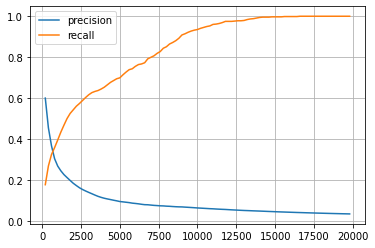

In [104]:
plt.plot(np.array(B_pop), np.array(B_tp) / (np.array(B_tp) + np.array(B_fp)), label='precision')
plt.plot(np.array(B_pop), np.array(B_tp) / (np.array(B_tp) + np.array(B_fn)), label='recall')
plt.grid()
plt.legend()
plt.show()

In [105]:
df[df['Label']==1].shape[0]/ df.shape[0]

0.025485254852548527